In [108]:
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#the functio to perform the mean shift clusttering
#input params: band_width
#              min_distance:
#              data_meanshift: the data to process, as we have a 2D data and one would have to
#                              perform as direction, the data shape here is 1D
#output result: clusterred: the reformed data after clustering
#               cluster_result: cluster result for each point in ndarray
#               current_cluster-1: the number of clusters


def meanShift(band_width, min_distance, data_meanshift):
    num_points = data_meanshift.size              # total number of points in one dataset
    cluster_flag = np.zeros(num_points)           # if each point is classified into a cluster or not, 0 refers to not clustered
    cluster_result = np.zeros(num_points)         # cluster result, for example 1 refers to cluster NO.1
    num_notclustterd = (cluster_flag == 0).sum()  # number of points not in any cluster yet
    clusterred = []


    current_cluster = 1                                # keep track of the cluster number 
    while num_notclustterd:
        index_temp = np.where(cluster_flag == 0)[0][0] # choose the first not clusterred points randomly as the mean
        current_mean = data_meanshift[index_temp]   
        diff_distance = np.Inf                         # initialize the distance different to be infinity
    
        while diff_distance > min_distance:            # stopping criteria for one cluster 
            distance_temp = (data_meanshift - current_mean)       # calculate the difference
            cluster_index = np.where(distance_temp < band_width)  # save the index of data that satify the criteria
            cluster_points = data_meanshift[cluster_index[0]]     # save data that satify the criteria
            #print(cluster_points)
            new_mean = np.mean(cluster_points)                    # calculate a new mean based on selected data
            #print(new_mean)
            diff_distance = np.abs(new_mean - current_mean)       # calculate the difference to the previous mean
            current_mean = new_mean
            #print(diff_distance)
        cluster_flag[cluster_index] = 1                           # set the flag to 1 to those who belong to the current
                                                                  # cluster and will not be visited again
        cluster_result[cluster_index]  = current_cluster          # set the cluster number to the data holder
        current_cluster = current_cluster + 1
        data_meanshift[cluster_index] = 1000                      # naive, set the number to be large enough so that it
                                                                  # would not be visited; using the clusterflat should 
                                                                  # make more sense
        num_notclustterd = (cluster_flag == 0).sum()              # check if all data are processed
        #print(cluster_flag)
        clusterred = [clusterred]
        
    return clusterred, cluster_result, current_cluster-1

In [119]:
# for plot
def plot_result(clusterred, cluster_result, current_cluster, data_x, data_y):
    cluster_color =["b","g","r","c","m","y","b","g","r","c","m"]
    fig = plt.figure()

    # plot different clusters
    for i in range(data_x.size):
        color_temp = cluster_color[int(cluster_result[i])-1]
        plt.plot(data_x[i], data_y[i],".",color=color_temp)

    # plot the mode for each cluster and print out mean and covariance value
    for i in range(current_cluster):

        data_x_cluster = data_x[np.where(cluster_result == i+1)]
        data_y_cluster = data_y[np.where(cluster_result == i+1)]
        data_temp=np.stack((data_x_cluster, data_y_cluster))
        mean_val = np.mean(data_temp,axis=1)
        cov_val = np.cov(data_temp)
        plt.plot(mean_val[0], mean_val[1], marker='o',markerfacecolor=cluster_color[i], markeredgecolor="k",markersize=10)
        print ("The mean value of the ", i+1, "clustter is: ", mean_val,"." )
        print ("The covariance value of the ", i+1, "clustter is: ", cov_val,"." )

In [120]:
# to pre-process the circular data into [x,y]
def pre_process(data_path):
    #read data from csv with one line of names for each col
    data_raw = np.genfromtxt(data_path,names=True, dtype=None, delimiter=',') 

    # as the dataset is circular of circular linear, we first remap it to [x y]
    data_theta = np.array(data_raw["theta"])
    data_r =  np.array(data_raw["r"])
    data_x = data_r* np.cos(data_theta)
    data_y = data_r* np.sin(data_theta)
    return data_theta, data_r, data_x, data_y

The mean value of the  1 clustter is:  [-0.78622952 -0.01037369] .
The covariance value of the  1 clustter is:  [[ 0.09377495 -0.00879855]
 [-0.00879855  0.30504982]] .
The mean value of the  2 clustter is:  [4.84509599 0.13390095] .
The covariance value of the  2 clustter is:  [[ 0.81410628 -0.145365  ]
 [-0.145365    2.63740948]] .
The mean value of the  3 clustter is:  [6.98759948 0.1380465 ] .
The covariance value of the  3 clustter is:  [[ 0.22831137 -0.03171087]
 [-0.03171087  2.61853101]] .


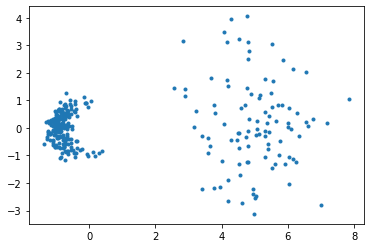

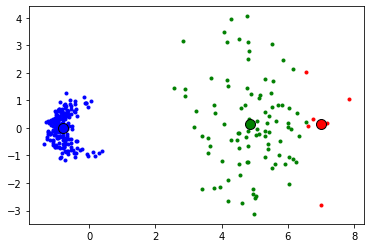

In [121]:
data_path = './data/data1.csv'
min_distance = 0.01
band_width = 1.5
[data_theta, data_r, data_x, data_y] = pre_process(data_path)

#visualize data after remapping
fig = plt.figure()
plt.plot(data_x, data_y,".")

# process and visualize
[clusterred, cluster_result, current_cluster] = meanShift(band_width, min_distance, data_r)
plot_result(clusterred, cluster_result, current_cluster, data_x, data_y)


The mean value of the  1 clustter is:  [2.94339086 2.17533466] .
The covariance value of the  1 clustter is:  [[ 0.60636279 -0.65247979]
 [-0.65247979  1.71951413]] .
The mean value of the  2 clustter is:  [4.68428735 0.91375231] .
The covariance value of the  2 clustter is:  [[ 0.69150871 -1.01368064]
 [-1.01368064  2.89887964]] .
The mean value of the  3 clustter is:  [ 6.0175686  -0.26103153] .
The covariance value of the  3 clustter is:  [[0.18811541 0.03027673]
 [0.03027673 3.27172896]] .
The mean value of the  4 clustter is:  [ 7.0322263  -0.45896103] .
The covariance value of the  4 clustter is:  [[0.06207734 0.4037448 ]
 [0.4037448  5.03997168]] .


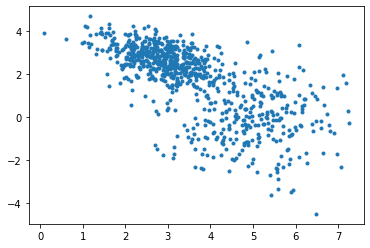

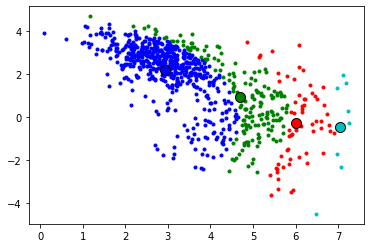

In [122]:
data_path = './data/data2.csv'
band_width = 0.7
[data_theta, data_r, data_x, data_y] = pre_process(data_path)

#visualize data after remapping
fig = plt.figure()
plt.plot(data_x, data_y,".")

# process and visualize
[clusterred, cluster_result, current_cluster] = meanShift(band_width, min_distance, data_r)
plot_result(clusterred, cluster_result, current_cluster, data_x, data_y)

The mean value of the  1 clustter is:  [-1.66613629  1.59808349] .
The covariance value of the  1 clustter is:  [[ 4.9100343  -1.60623006]
 [-1.60623006  2.18647159]] .
The mean value of the  2 clustter is:  [3.1543514  0.83191976] .
The covariance value of the  2 clustter is:  [[13.25288152 -5.09195641]
 [-5.09195641  4.08903679]] .
The mean value of the  3 clustter is:  [ 6.62110745 -0.10171635] .
The covariance value of the  3 clustter is:  [[0.22474723 0.01503337]
 [0.01503337 3.41252714]] .


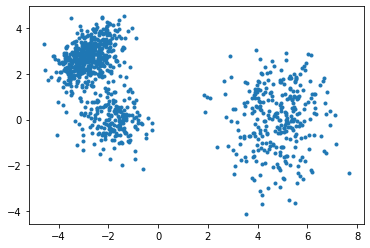

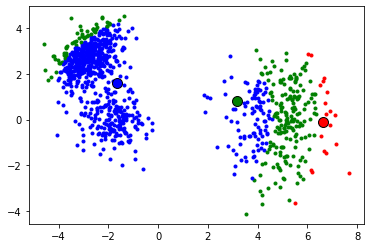

In [123]:
data_path = './data/data3.csv'
[data_theta, data_r, data_x, data_y] = pre_process(data_path)
band_width = 1.2
#visualize data after remapping
fig = plt.figure()
plt.plot(data_x, data_y,".")

# process and visualize
[clusterred, cluster_result, current_cluster] = meanShift(band_width, min_distance, data_r)
plot_result(clusterred, cluster_result, current_cluster, data_x, data_y)

The mean value of the  1 clustter is:  [4.73041204 1.17151507] .
The covariance value of the  1 clustter is:  [[ 1.07680309 -0.1144449 ]
 [-0.1144449   0.92282515]] .
The mean value of the  2 clustter is:  [-1.9516084   0.01448106] .
The covariance value of the  2 clustter is:  [[0.25826959 0.00303914]
 [0.00303914 0.1629736 ]] .
The mean value of the  3 clustter is:  [ 4.73479922 -1.25837421] .
The covariance value of the  3 clustter is:  [[0.87445523 0.09085023]
 [0.09085023 0.90623846]] .


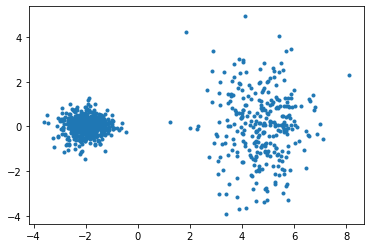

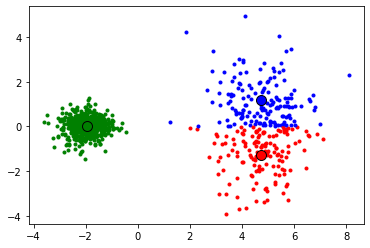

In [124]:
data_path = './data/data4.csv'
band_width = 1
[data_theta, data_r, data_x, data_y] = pre_process(data_path)

#visualize data after remapping
fig = plt.figure()
plt.plot(data_x, data_y,".")

# process and visualize
[clusterred, cluster_result, current_cluster] = meanShift(band_width, min_distance, data_theta)
plot_result(clusterred, cluster_result, current_cluster, data_x, data_y)

The mean value of the  1 clustter is:  [3.45277163 1.6605835 ] .
The covariance value of the  1 clustter is:  [[ 0.45304117 -0.44506149]
 [-0.44506149  1.60443849]] .
The mean value of the  2 clustter is:  [ 5.33217634 -0.01142271] .
The covariance value of the  2 clustter is:  [[ 0.41449538 -0.17890899]
 [-0.17890899  3.59722069]] .
The mean value of the  3 clustter is:  [ 6.96607849 -0.82239905] .
The covariance value of the  3 clustter is:  [[0.21639761 0.19730184]
 [0.19730184 2.32904892]] .


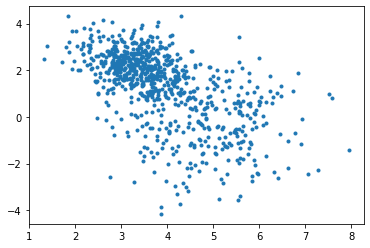

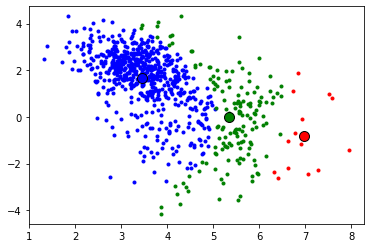

In [125]:
data_path = './data/data5.csv'
band_width = 1
[data_theta, data_r, data_x, data_y] = pre_process(data_path)

#visualize data after remapping
fig = plt.figure()
plt.plot(data_x, data_y,".")

# process and visualize
[clusterred, cluster_result, current_cluster] = meanShift(band_width, min_distance, data_r)
plot_result(clusterred, cluster_result, current_cluster, data_x, data_y)

The mean value of the  1 clustter is:  [1.8544436 1.2187651] .
The covariance value of the  1 clustter is:  [[ 1.15252815 -0.74748841]
 [-0.74748841  2.02037773]] .
The mean value of the  2 clustter is:  [2.80797793 1.05868803] .
The covariance value of the  2 clustter is:  [[ 1.63040149 -1.42017465]
 [-1.42017465  5.02267257]] .
The mean value of the  3 clustter is:  [4.15402558 0.38336721] .
The covariance value of the  3 clustter is:  [[ 0.61682047 -0.19835895]
 [-0.19835895  7.07217604]] .


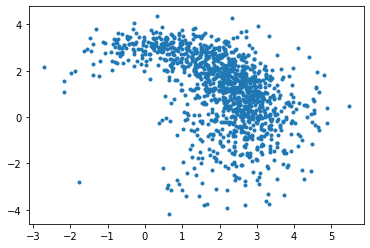

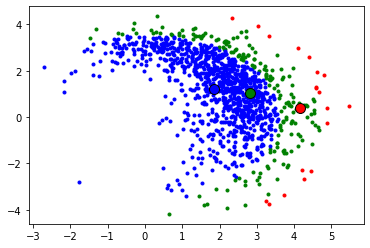

In [126]:
data_path = './data/data6.csv'
band_width = 0.8
[data_theta, data_r, data_x, data_y] = pre_process(data_path)

#visualize data after remapping
fig = plt.figure()
plt.plot(data_x, data_y,".")

# process and visualize
[clusterred, cluster_result, current_cluster] = meanShift(band_width, min_distance, data_r)
plot_result(clusterred, cluster_result, current_cluster, data_x, data_y)

The mean value of the  1 clustter is:  [0.01169898 2.43486164] .
The covariance value of the  1 clustter is:  [[ 2.11723578 -0.07404559]
 [-0.07404559  0.58011483]] .
The mean value of the  2 clustter is:  [-0.06568609  3.98044095] .
The covariance value of the  2 clustter is:  [[ 5.73663738 -0.06815426]
 [-0.06815426  1.15101721]] .
The mean value of the  3 clustter is:  [0.10731107 4.97217675] .
The covariance value of the  3 clustter is:  [[ 8.1656813  -0.24131626]
 [-0.24131626  1.17038314]] .


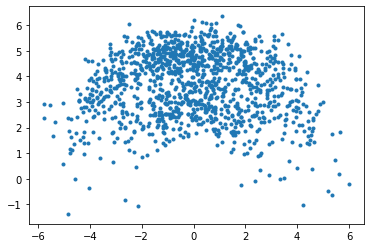

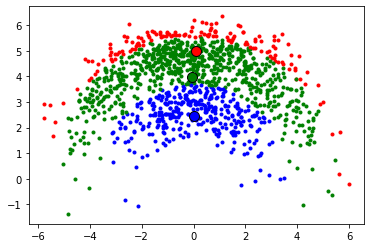

In [127]:
data_path = './data/data7.csv'
band_width = 0.8
[data_theta, data_r, data_x, data_y] = pre_process(data_path)

#visualize data after remapping
fig = plt.figure()
plt.plot(data_x, data_y,".")

# process and visualize
[clusterred, cluster_result, current_cluster] = meanShift(band_width, min_distance, data_r)
plot_result(clusterred, cluster_result, current_cluster, data_x, data_y)